<a href="https://colab.research.google.com/github/nowoclock/PM_data/blob/main/PM_summarize_1223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그룹화란?

- 1반 2반 3반의 점수가 섞여 있을 때 각 반의 평균을 따로 구해서 다시 하나의 데이터 프레임으로 합치는 것
- 데이터프레임의 같은 열들을 그룹화하는 것

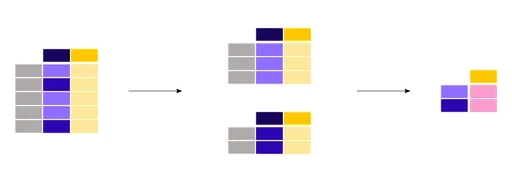

## Groupby

- 데이터를 그룹화하고, 그룹별로 계산 작업을 할 수 있는 도구.
- 복잡한 데이터 집합에서 특정 기준으로 그룹화하고, 그룹별로 데이터를 요약하거나 통계치를 계산할 수 있다.
- 동작 순서
    1. 분할(Split) : 데이터를 특정 기준에 따라 여러 그룹으로 분할한다.
    2. 적용(Apply) : 각 그룹에 대해 하나 이상의 함수를 적용하여 결과를 얻습니다.
    3. 결합(Combine) : 모든 함수 적용 결과를 하나의 데이터 구조로 결합한다.

    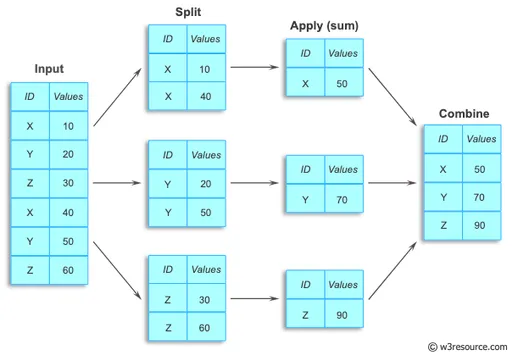

### 예시 데이터

In [2]:
import pandas as pd

data = {
    "부서": [
        "영업",
        "IT",
        "인사",
        "IT",
        "IT",
        "인사",
        "영업",
        "IT",
        "인사",
        "IT",
        "인사",
        "IT",
        "마케팅",
        "영업",
        "회계",
        "회계",
    ],
    "이름": [
        "김민수",
        "박수현",
        "이영호",
        "최은지",
        "정우진",
        "김다은",
        "이정호",
        "박지영",
        "정예슬",
        "최성민",
        "한가람",
        "장수진",
        "윤석호",
        "심지혜",
        "이동현",
        "김준호",
    ],
    "나이": [34, 29, 40, 33, 28, 32, 36, 27, 38, 31, 30, 35, 33, 25, 42, 37],
    "연봉": [
        6500,
        5500,
        5000,
        6200,
        6100,
        5200,
        6400,
        5700,
        5600,
        6300,
        6000,
        5800,
        6600,
        6500,
        7100,
        6900,
    ],
    "지역": [
        "서울",
        "부산",
        "대구",
        "서울",
        "서울",
        "대구",
        "부산",
        "서울",
        "대구",
        "서울",
        "대구",
        "서울",
        "부산",
        "부산",
        "서울",
        "부산",
    ],
}

df = pd.DataFrame(data)

## 1. '지역' 열 기준 그룹화

In [3]:
grouped = df.groupby("지역")

## 2. 집계 함수

- sum() : 합계
- mean() : 평균
- median() : 중앙값
- min() : 최소값
- max() : 최대값
- count() : 그룹 내 데이터 수
- std() : 표준편차
- var() : 분산

In [8]:
sum_grouped = grouped.sum()

# 행이름 dataFrame.index
print(sum_grouped.index)
sum_grouped.loc["서울"]

# 행 이름을 행 번호로 사용하고 싶은경우
sum_grouped.reset_index()

Index(['대구', '부산', '서울'], dtype='object', name='지역')


,지역,부서,이름,나이,연봉
0,대구,인사인사인사인사,이영호김다은정예슬한가람,140,21800
1,부산,IT영업마케팅영업회계,박수현이정호윤석호심지혜김준호,160,31900
2,서울,영업ITITITITIT회계,김민수최은지정우진박지영최성민장수진이동현,230,43700


In [17]:
# 부서를 기준으로 그룹화
# 그룹화된 데이터의 "연봉"열에 대해 집계함수 함계 sum()을 적용
grouped = df.groupby("부서")
sum_grouped = grouped['연봉'].sum()
sum_grouped

,연봉
부서,
IT,35600
마케팅,6600
영업,19400
인사,21800
회계,14000


In [18]:
# "부서"를 기준으로 그룹화
# 그룹화한 데이터의 "나이"열에 대해 평균 mean()을 계산
grouped = df.groupby("부서")
mean_grouped = grouped['나이'].mean()
mean_grouped

,나이
부서,
IT,30.500000
마케팅,33.000000
영업,31.666667
인사,35.000000
회계,39.500000


In [19]:
# ["지역", "부서"]를 기준으로 그룹화
# 그룹화한 데이터의 "연봉"열에 대해 최대값 max()를 계산
grouped = df.groupby(["지역", "부서"])
max_grouped = grouped['연봉'].max()
max_grouped

지역  부서 
대구  인사     6000
부산  IT     5500
    마케팅    6600
    영업     6500
    회계     6900
서울  IT     6300
    영업     6500
    회계     7100
Name: 연봉, dtype: int64

## 3. 그룹 필터링

**`DataFrame.groupby("열 이름").filter(조건 함수)`**

- 특정 조건을 만족하는 그룹을 선택한다.
- **`조건 함수`** 는 각 그룹에 적용되어 **`True`** 를 반환하는 그룹만 선택한다.
- 조건 식은 사용이 불가능하다.
- 조건식 대신 DataFrame.groupby('열').filter(함수)

In [21]:
# 함수는 def라는 키워드로 시작해서 설계
def add(x,y):
    result = x + y
    return result

add(10, 20)

30

In [22]:
# 부서당 인원수 출력
grouped["이름"].count()

지역  부서 
대구  인사     4
부산  IT     1
    마케팅    1
    영업     2
    회계     1
서울  IT     5
    영업     1
    회계     1
Name: 이름, dtype: int64

In [23]:
# 부서의 인원수가 2명보다 많은 부서를 필터링
# 1. 그룹화
group_rows = df.groupby("부서")

# 조건 함수
# 매개 변수 : 그룹화한 데이터의 개별 핼
filtered = group_rows.filter(lambda x: len(x) > 2)

def greater_count_tow(group):
    count = group["이름"].count()
    return count > 2

    if count > 2:
        return True
    else:
        return False

filtered = grouped.filter(greater_count_tow)
filtered

# 2. 필터링
filtered

,부서,이름,나이,연봉,지역
0,영업,김민수,34,6500,서울
1,IT,박수현,29,5500,부산
2,인사,이영호,40,5000,대구
3,IT,최은지,33,6200,서울
4,IT,정우진,28,6100,서울
5,인사,김다은,32,5200,대구
6,영업,이정호,36,6400,부산
7,IT,박지영,27,5700,서울
8,인사,정예슬,38,5600,대구
9,IT,최성민,31,6300,서울


In [25]:
# 그룹화
group_rows = df.groupby("부서")

# 조건함수
# 매개 변수 : 부서를 기준으로 그룹화된 행 데이터
def greater_salary(group):
    mean_salary = group["연봉"].mean()
    if mean_salary >= 6000:
        return True
    else:
        return False
    return

# 필터링
filtered = group_rows.filter(greater_salary)
filtered



,부서,이름,나이,연봉,지역
0,영업,김민수,34,6500,서울
6,영업,이정호,36,6400,부산
12,마케팅,윤석호,33,6600,부산
13,영업,심지혜,25,6500,부산
14,회계,이동현,42,7100,서울
15,회계,김준호,37,6900,부산


## 다중 집계함수
**`DataFrame.agg(집계 함수)`**

- 데이터프레임의 여러 열에 여러개의 집계 함수를 적용한다.

In [27]:
# 연봉 열에 평균과 중위값
df["연봉"].agg(['median', 'mean'])

# 나이열의 최대 최소 평균
df['나이'].agg(['max', 'min', 'mean'])

,나이
max,42.000
min,25.000
mean,33.125


In [28]:
# 딕셔너리 활용해서 열과 열에 작성
df.agg({
    '이름' : 'count',
    '연봉' : ['mean', 'median'],
    '나이' : ['min', 'max', 'mean']
})

,이름,연봉,나이
count,16.0,NaN,NaN
mean,NaN,6087.5,33.125
median,NaN,6150.0,NaN
min,NaN,NaN,25.000
max,NaN,NaN,42.000


### 그룹 다중 집계 함수

**`DataFrame.groupby("열 이름").agg(집계 함수)`**

- 그룹화 데이터의 여러 열에 여러개의 집계 함수를 적용한다.

In [35]:
# 그룹화된 데이터에 다중 집계함수 .agg()
group_rows = df.groupby('지역')

result = group_rows.agg({
    '이름' : 'count',
    '연봉' : ['mean', 'median'],
    '나이' : ['min', 'max', 'mean']
})

# 다중 집계함수의 결과 : 컬럼들이 계층 구조를 가진다.
# 연봉의 평균 선택
result[('연봉', 'mean')]
result.loc[:, ('나이', ['min', 'max'])]

나이    
   min max
지역        
대구  30  40
부산  25  37
서울  27  42

# [실습]

### (1) 데이터 그룹 요약 & 필터링하기

1. 아래 `vgsales.csv` 파일을 다운로드 받아서 데이터프레임 생성하고, 실습 문제를 해결한다.
    
    [Video Game Sales](https://www.kaggle.com/datasets/yasrebi/video-game-sales)
    
    [vgsales.csv](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/badb809f-442f-4952-9c55-f043b77d4423/vgsales.csv)
    
    - 데이터 설명
        - title : 게임 이름
        - console : 출시 플랫폼(예시 : PC, PS4 등)
        - genre : 게임 장르
        - publisher : 게임 발매사
        - developer : 게임 개발사
        - critic_score : 평론가 점수
        - total_sales : 전 세계 판매량(단위 : 백만장)
        - na_sales : 북미 판매량(단위 : 백만장)
        - jp_sales : 일본 판매량(단위 : 백만장)
        - pal_sales : 유럽 및 아프리카 판매량(단위 : 백만장)
        - otehr_sales : 기타 지역 판매량(단위 : 백만장)
        - release_date : 게임 출시 날짜
    
2. `head()` 와 `info()` 를 사용하여 데이터의 구조를 파악한다.
3. 장르별 세계 판매량 합계를 출력한다.
4. 플랫폼별 세계 판매량 평균을 출력한다.
5. 개발사별 게임 출시 개수를 출력한다.
6. 플랫폼별 세계 판매량, 북미 판매량, 일본 판매량, 유럽 및 지역 아프리카 판매량, 기타 지역 판매량의 합계와 평균을 출력한다.
7. 평론가 점수의 평균이 9.5가 넘는 게임 개발사를 선택해서 출력한다.

In [37]:
df = pd.read_csv('/content/drive/MyDrive/PM_교육/DataSets/vgsales.csv')
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28


In [39]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
dtypes: float64(6), object(6)
memory usage: 5.9+ MB


In [40]:
group_rows = df.groupby('genre')
group_rows['total_sales'].sum()

,total_sales
genre,
Action,1125.89
Action-Adventure,148.52
Adventure,325.39
Board Game,0.33
Education,0.97
Fighting,341.13
MMO,9.31
Misc,557.79
Music,51.75


In [41]:
group_rows = df.groupby('console')
group_rows['total_sales'].mean()

,total_sales
console,
2600,0.600476
3DO,0.047500
3DS,0.176637
5200,NaN
7800,NaN
...,...
XOne,0.513282
XS,NaN
ZXS,NaN


In [42]:
group_rows = df.groupby('developer')
group_rows['title'].count()

,title
developer,
.theprodukkt,1
07th Expansion,9
0verflow,2
100 Stones Interactive,2
1047 Games,1
...,...
yuwaka,2
yyr,3
zSlide,1


In [43]:
group_rows = df.groupby('console')
group_rows.agg({
    'total_sales' : ['sum', 'mean'],
    'na_sales' : ['sum', 'mean'],
    'jp_sales' : ['sum', 'mean'],
    'pal_sales' : ['sum', 'mean'],
    'other_sales' : ['sum', 'mean']
})

total_sales           na_sales           jp_sales           pal_sales  \
                sum      mean      sum      mean      sum      mean       sum   
console                                                                         
2600          75.66  0.600476    70.62  0.560476     0.00       NaN      4.25   
3DO            0.19  0.047500     0.00       NaN     0.19  0.047500      0.00   
3DS           99.27  0.176637    30.37  0.126542    41.74  0.110423     22.24   
5200           0.00       NaN     0.00       NaN     0.00       NaN      0.00   
7800           0.00       NaN     0.00       NaN     0.00       NaN      0.00   
...             ...       ...      ...       ...      ...       ...       ...   
XOne         268.96  0.513282   164.53  0.334411     0.38  0.013103     79.44   
XS             0.00       NaN     0.00       NaN     0.00       NaN      0.00   
ZXS            0.00       NaN     0.00       NaN     0.00       NaN      0.00   
iOS            0.00       NaN     0.00       NaN     0.00       NaN      0.00   
iQue           0.00       NaN     0.00       NaN     0.00       NaN      0.00   

                  other_sales            
             mean         sum      mean  
console                                  
2600     0.033730        0.69  0.005476  
3DO           NaN        0.00       NaN  
3DS      0.090040        4.88  0.016321  
5200          NaN        0.00       NaN  
7800          NaN        0.00       NaN  
...           ...         ...       ...  
XOne     0.236429       24.53  0.046902  
XS            NaN        0.00       NaN  
ZXS           NaN        0.00       NaN  
iOS           NaN        0.00       NaN  
iQue          NaN        0.00       NaN  

[81 rows x 10 columns]

In [50]:
group_rows = df.groupby('critic_score')

def score(group):
    mean_score = group['critic_score'].mean()

    if mean_score > 9.5:
        return True
    else:
        return False
    return

filtered = group_rows.filter(score)
filtered

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
16,Grand Theft Auto IV,X360,Action,Rockstar Games,Rockstar North,10.0,11.09,6.80,0.14,3.11,1.04,2008-04-29
19,Grand Theft Auto IV,PS3,Action,Rockstar Games,Rockstar North,10.0,10.57,4.79,0.44,3.73,1.62,2008-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
53223,Fusion: Genesis,XBL,Shooter,Microsoft,Starfire Studios,10.0,NaN,NaN,NaN,NaN,NaN,2011-11-09
54102,Renegade Ops,XBL,Shooter,Sega,Avalanche Studios,10.0,NaN,NaN,NaN,NaN,NaN,2011-09-14
59348,NBA 2K2,DC,Sports,Sega,Visual Concepts,9.6,NaN,NaN,NaN,NaN,NaN,2001-10-24
60217,Tony Hawk's Pro Skater,DC,Sports,Crave Entertainment,Treyarch,9.6,NaN,NaN,NaN,NaN,NaN,2000-06-29
